In [43]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score

In [2]:
# first way to do it 
class instance:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def leaf_instance(self):
        if self.value is not None:
            return True
        else :
            return False
        
        
class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None
        
    def fit(self,x,y):
        if self.n_features is None:
            self.n_features = x.shape[1]
        else :
            self.n_features = min(x.shape[1],self.n_features)
            
        self.root = self.build_tree(x,y)
        
    def build_tree(self,x,y,depth=0):
        # check the stopping criteria for stopping recursion calls
        n_sample,n_feature = x.shape
        n_labels = len(np.unique(y))
        
        if (depth>=self.max_depth or n_labels==1 or n_sample<self.min_samples_split):
            leaf_val = self.__most_common_lebel(y)
            return instance(value=leaf_val)
        
        #find the best split criteria
        feature_index = np.random.choice(n_feature,self.n_features,replace=False)
        best_feature, best_thresh = self.best_split_criterion(x,y,feature_index)
        
        left_idx ,right_idx = self.split(x[:,best_feature],best_thresh)
        left = self.build_tree(x[left_idx,:],y[left_idx],depth+1)
        right = self.build_tree(x[right_idx,:],y[right_idx],depth+1)
        return instance(feature=best_feature,threshold=best_thresh,left=left,right=right)
        
    def best_split_criterion(self,x,y,feature_index):
        best_gain = -1
        split_idx ,split_threshold = None,None
        for feature_index in feature_index:
            x_col = x[:,feature_index]
            threshold = np.unique(x_col)
            
            for thr in threshold:
                #calculate information gain
                gain = self.information_gain(y,x_col,thr)
                if gain>best_gain:
                    best_gain = gain
                    split_idx = feature_index
                    split_threshold = thr
                
        return split_idx,split_threshold
    
    def information_gain(self,y,x_col,threshold):
        parent_entropy = self.entropy(y)
        
        left_idx,right_idx = self.split(x_col,threshold)
        if len(left_idx)==0 or len(right_idx)==0:
            return 0
        left_entropy = self.entropy(y[left_idx])
        right_entropy = self.entropy(y[right_idx])
        
        n_left,n_right = len(left_idx),len(right_idx)
        child_entropy = len(left_idx)/len(y)*left_entropy + len(right_idx)/len(y)*right_entropy
        info_gain = parent_entropy-child_entropy
        return info_gain
    
    
    def split(self,x_col,threshold):
        left_idx = np.argwhere(x_col<= threshold).flatten()
        right_idx = np.argwhere(x_col> threshold).flatten()
        return left_idx,right_idx
    
        
    def entropy(self,y):
        hst = np.bincount(y)
        p = hst/len(y)
        for i in p :
            if i>0:
                return -np.sum(i*np.log2(i))
        
    def __most_common_lebel(self,y):
        counter = Counter(y)
        return counter.most_common(1)[0][0]
        
    def predict(self,X):
        return np.array([self.traverse(x,self.root) for x in X] )
    
    def traverse(self,X,node):
        if node.leaf_instance():
            return node.value
        
        if X[node.feature]<=node.threshold:
            return self.traverse(X,node.left)
        return self.traverse(X,node.right)
            

In [57]:
data = datasets.load_breast_cancer()
x,y = data.data,data.target
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
clf = DecisionTree()
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
acc = np.sum(y_test==pred)/len(y_test)
print(acc)

0.9532163742690059


In [4]:
node = instance(value=10)
node.leaf_instance()

True

In [25]:
df = pd.DataFrame(data['data'],columns=data['feature_names'])
df['target'] = data['target']

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


<Axes: xlabel='target'>

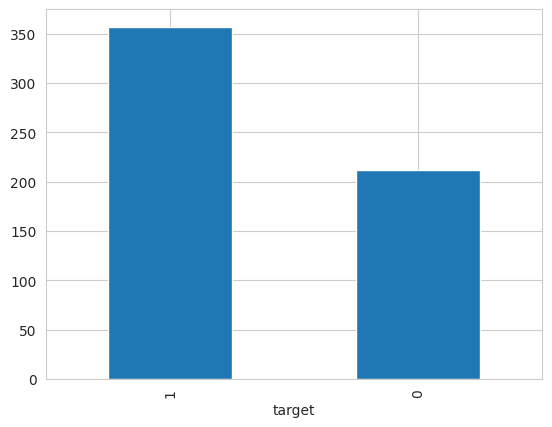

In [42]:
df['target'].value_counts().plot(kind='bar')

In [59]:
clf1 = DecisionTreeClassifier(max_depth=3)
clf1.fit(x_train,y_train)
y_pr = clf.predict(x_test)
print(r2_score(y_test,y_pr))
acc = np.sum(y_test==y_pr)/len(y_test)
print(acc) # same accuracy as the above written class of DecisionTree 

0.798941798941799
0.9532163742690059


In [56]:
print(clf1.tree_.value) 

[[[149. 249.]]

 [[ 13. 232.]]

 [[  5. 225.]]

 [[  3. 224.]]

 [[  2.   1.]]

 [[  8.   7.]]

 [[  0.   5.]]

 [[  8.   2.]]

 [[136.  17.]]

 [[  4.  10.]]

 [[  0.  10.]]

 [[  4.   0.]]

 [[132.   7.]]

 [[  6.   7.]]

 [[126.   0.]]]
